# DAY10

1. 把之前所有的处理手段都处理一遍，回顾一下全流程，以后就用处理好的部分直接完成
2. 开始机器学习建模（简单建模，不涉及调参）和评估



# 一、数据预处理
## 1.1 导入所需要的包

这里其实是写完后一起整理到这里的

In [255]:
import pandas as pd
import pandas as pd    #用于数据处理和分析，可处理表格数据。
import numpy as np     #用于数值计算，提供了高效的数组操作。
import matplotlib.pyplot as plt    #用于绘制各种类型的图表
import seaborn as sns   #基于matplotlib的高级绘图库，能绘制更美观的统计图形。
import warnings
warnings.filterwarnings('ignore')
 
 # 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

## 1.2 查看数据信息

In [256]:
data = pd.read_csv('E:\study\PythonStudy\python60-days-challenge-master\data.csv')    #读取数据

In [257]:
data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


## 1.3 特征名映射

In [258]:
# 创建特征名中文映射字典
feature_name_mapping = {
    'Annual Income': '年收入',
    'Years in current job': '当前工作年限',
    'Tax Liens': '税收留置权',
    'Number of Open Accounts': '开放账户数量',
    'Years of Credit History': '信用历史年限',
    'Maximum Open Credit': '最大开放信用额度',
    'Number of Credit Problems': '信用问题数量',
    'Months since last delinquent': '距上次拖欠月数',
    'Bankruptcies': '破产次数',
    'Current Loan Amount': '当前贷款金额',
    'Current Credit Balance': '当前信用余额',
    'Monthly Debt': '月债务',
    'Credit Score': '信用评分',
    'Home Ownership': '房屋所有权',
    'Term': '贷款期限',
    'Purpose': '贷款目的',
    'Credit Default': '信用违约'
}

# 重命名数据框的列名
data = data.rename(columns=feature_name_mapping)
data.head()

,Id,房屋所有权,年收入,当前工作年限,税收留置权,开放账户数量,信用历史年限,最大开放信用额度,信用问题数量,距上次拖欠月数,破产次数,贷款目的,贷款期限,当前贷款金额,当前信用余额,月债务,信用评分,信用违约
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


## 1.4 删除无用列

In [259]:
# 删除无用列，如ID列
data = data.drop(columns=['Id'])
data.head()

,房屋所有权,年收入,当前工作年限,税收留置权,开放账户数量,信用历史年限,最大开放信用额度,信用问题数量,距上次拖欠月数,破产次数,贷款目的,贷款期限,当前贷款金额,当前信用余额,月债务,信用评分,信用违约
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


## 1.5 编码映射

先打印看一下可能有问题的几个特征的分布，分别是房屋所有权、当前工作年限、贷款目的、贷款期限

这里我们没有再用根据变量类型来筛选的方法了，因为那样很粗糙，我们实际上肯定要理解数据的

In [260]:
# 先打印看一下可能有问题的几个特征的分布，分别是房屋所有权、当前工作年限、贷款目的、贷款期限
print(data['房屋所有权'].value_counts())

房屋所有权
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64


In [261]:
# 对房屋所有权进行映射
mappings = {
    "房屋所有权": {
        "Rent": 0, # 租房
        "Have Mortgage": 1, # 有房贷
        "Home Mortgage": 1, # 有房贷
        "Own Home": 2, # 自有住房
    }
}
data = data.replace(mappings)
data['房屋所有权'].value_counts()

房屋所有权
1    3649
0    3204
2     647
Name: count, dtype: int64

In [262]:
print(data['当前工作年限'].value_counts())

当前工作年限
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: count, dtype: int64


In [263]:
# 对当前工作年限进行映射
work_year_mappings = {
    "当前工作年限": {
        "< 1 year": 0,
        "1 year": 1,
        "2 years": 2,
        "3 years": 3,
        "4 years": 4,
        "5 years": 5,
        "6 years": 6,
        "7 years": 7,
        "8 years": 8,
        "9 years": 9,
        "10+ years": 10
    }
}
data = data.replace(work_year_mappings)
data['当前工作年限'].value_counts()

当前工作年限
10.0    2332
2.0      705
3.0      620
0.0      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: count, dtype: int64

In [264]:
print(data['贷款目的'].value_counts())

贷款目的
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: count, dtype: int64


贷款目的是一个需要独热编码的特征，这里为了方便，我们还是沿用便签编码了-----法无定则

注意我们之前说了，如果独热编码的话，就需要先填补缺失值，再独热编码比较合适


In [265]:
# 根据 value_counts() 频率顺序定义映射字典
purpose_ordinal_map = {
    "debt consolidation": 0,
    "other": 1,
    "home improvements": 2,
    "business loan": 3,
    "buy a car": 4,
    "medical bills": 5,
    "major purchase": 6,
    "take a trip": 7,
    "buy house": 8,
    "small business": 9,
    "wedding": 10,
    "moving": 11,
    "educational expenses": 12,
    "vacation": 13,
    "renewable energy": 14
}

# 直接替换原列
data['贷款目的'] = data['贷款目的'].replace(purpose_ordinal_map)

print(data['贷款目的'].value_counts())

贷款目的
0     5944
1      665
2      412
3      129
4       96
5       71
6       40
7       37
8       34
9       26
10      15
11      11
12      10
13       8
14       2
Name: count, dtype: int64


In [266]:
print(data['贷款期限'].value_counts())

贷款期限
Short Term    5556
Long Term     1944
Name: count, dtype: int64


In [267]:
# 对贷款期限进行映射
term_mapping = {
        "Short Term": 0,
        "Long Term": 1
}
data['贷款期限'] = data['贷款期限'].replace(term_mapping)
data['贷款期限'].value_counts()

贷款期限
0    5556
1    1944
Name: count, dtype: int64

In [268]:
data.head()

,房屋所有权,年收入,当前工作年限,税收留置权,开放账户数量,信用历史年限,最大开放信用额度,信用问题数量,距上次拖欠月数,破产次数,贷款目的,贷款期限,当前贷款金额,当前信用余额,月债务,信用评分,信用违约
0,2,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,0,0,99999999.0,47386.0,7914.0,749.0,0
1,2,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,0,1,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,0,0,99999999.0,308389.0,13651.0,742.0,0
3,2,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,0,0,121396.0,95855.0,11338.0,694.0,0
4,0,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,0,0,125840.0,93309.0,7180.0,719.0,0


现在已经没有非数值类型的特征了

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   房屋所有权     7500 non-null   int64  
 1   年收入       5943 non-null   float64
 2   当前工作年限    7129 non-null   float64
 3   税收留置权     7500 non-null   float64
 4   开放账户数量    7500 non-null   float64
 5   信用历史年限    7500 non-null   float64
 6   最大开放信用额度  7500 non-null   float64
 7   信用问题数量    7500 non-null   float64
 8   距上次拖欠月数   3419 non-null   float64
 9   破产次数      7486 non-null   float64
 10  贷款目的      7500 non-null   int64  
 11  贷款期限      7500 non-null   int64  
 12  当前贷款金额    7500 non-null   float64
 13  当前信用余额    7500 non-null   float64
 14  月债务       7500 non-null   float64
 15  信用评分      5943 non-null   float64
 16  信用违约      7500 non-null   int64  
dtypes: float64(13), int64(4)
memory usage: 996.2 KB


## 1.6 填补缺失值

In [270]:

# 确定需要填充的列
missing_cols = [
    '年收入', 
    '当前工作年限', 
    '距上次拖欠月数', 
    '破产次数', 
    '信用评分'
]

print("开始使用众数（Mode）填充缺失值...")

for col in missing_cols:
    # 计算众数。由于可能存在多个众数，.mode() 返回 Series，我们取第一个 [0]
    mode_val = data[col].mode()[0]
    
    # 使用众数填充缺失值
    data[col].fillna(mode_val, inplace=True)
    
    print(f"列 '{col}' 已使用众数 {mode_val} 填充。")

# 验证处理结果
print("\n--- 缺失值处理后的 DataFrame 信息 ---")
data.info()

开始使用众数（Mode）填充缺失值...
列 '年收入' 已使用众数 969475.0 填充。
列 '当前工作年限' 已使用众数 10.0 填充。
列 '距上次拖欠月数' 已使用众数 14.0 填充。
列 '破产次数' 已使用众数 0.0 填充。
列 '信用评分' 已使用众数 740.0 填充。

--- 缺失值处理后的 DataFrame 信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   房屋所有权     7500 non-null   int64  
 1   年收入       7500 non-null   float64
 2   当前工作年限    7500 non-null   float64
 3   税收留置权     7500 non-null   float64
 4   开放账户数量    7500 non-null   float64
 5   信用历史年限    7500 non-null   float64
 6   最大开放信用额度  7500 non-null   float64
 7   信用问题数量    7500 non-null   float64
 8   距上次拖欠月数   7500 non-null   float64
 9   破产次数      7500 non-null   float64
 10  贷款目的      7500 non-null   int64  
 11  贷款期限      7500 non-null   int64  
 12  当前贷款金额    7500 non-null   float64
 13  当前信用余额    7500 non-null   float64
 14  月债务       7500 non-null   float64
 15  信用评分      7500 non-null   float64
 16  信用违约   

## 1.7 异常值处理

1. 我们之前没说异常值的处理，实际上是可处理可不处理的，因为这需要考验你对于实际数据的理解，而且不处理也会增强泛化性和鲁棒性，因为实际中很多收上来的数据本身就有问题
2. 异常值一般不处理，或者结合对照试验处理和不处理都尝试下，但是论文中要写这个，作为工作量

In [271]:
data.head()

,房屋所有权,年收入,当前工作年限,税收留置权,开放账户数量,信用历史年限,最大开放信用额度,信用问题数量,距上次拖欠月数,破产次数,贷款目的,贷款期限,当前贷款金额,当前信用余额,月债务,信用评分,信用违约
0,2,482087.0,10.0,0.0,11.0,26.3,685960.0,1.0,14.0,1.0,0,0,99999999.0,47386.0,7914.0,749.0,0
1,2,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,14.0,0.0,0,1,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,14.0,0.0,0,0,99999999.0,308389.0,13651.0,742.0,0
3,2,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,14.0,1.0,0,0,121396.0,95855.0,11338.0,694.0,0
4,0,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,14.0,0.0,0,0,125840.0,93309.0,7180.0,719.0,0


这里我们选择年收入来处理吧，我们选择四分位数范围 (IQR)，他是基于箱线图原理来定义异常值边界

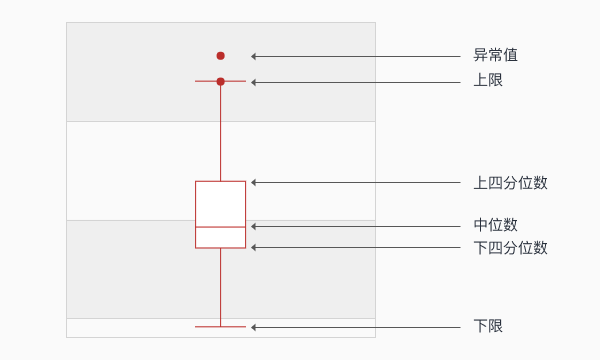

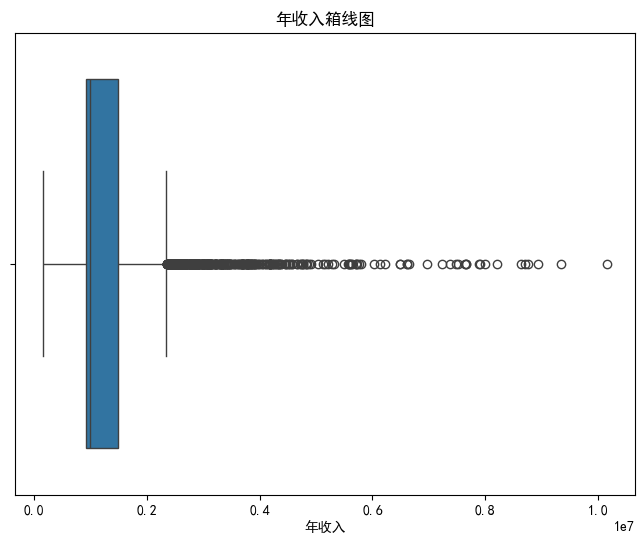

In [272]:
# 绘制年收入的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['年收入'])
plt.title('年收入箱线图')
plt.xlabel('年收入')
plt.show()

In [273]:
column_name = '年收入'

# 1. 计算 Q1, Q3 和 IQR
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# 2. 确定异常值边界 (使用 1.5 倍 IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"--- '{column_name}' 异常值处理信息 ---")
print(f"Q1 (25th Percentile): {Q1:.2f}")
print(f"Q3 (75th Percentile): {Q3:.2f}")
print(f"IQR (Q3 - Q1): {IQR:.2f}")
print(f"下限 (Lower Bound): {lower_bound:.2f}")
print(f"上限 (Upper Bound): {upper_bound:.2f}")

# 3. 筛选数据：保留在边界内的数据
data_before_drop = len(data)
data_filtered = data[
    (data[column_name] >= lower_bound) & 
    (data[column_name] <= upper_bound)
].copy() # 使用 .copy() 避免 SettingWithCopyWarning

# 4. 更新 DataFrame 并报告结果
data = data_filtered
data_after_drop = len(data)
rows_dropped = data_before_drop - data_after_drop

print(f"\n原始数据行数: {data_before_drop}")
print(f"删除异常值后行数: {data_after_drop}")
print(f"共删除异常值 (行): {rows_dropped}")

print(f"\nDataFrame 已更新，'{column_name}' 的异常值已被移除。")

--- '年收入' 异常值处理信息 ---
Q1 (25th Percentile): 931133.00
Q3 (75th Percentile): 1499974.00
IQR (Q3 - Q1): 568841.00
下限 (Lower Bound): 77871.50
上限 (Upper Bound): 2353235.50

原始数据行数: 7500
删除异常值后行数: 6984
共删除异常值 (行): 516

DataFrame 已更新，'年收入' 的异常值已被移除。


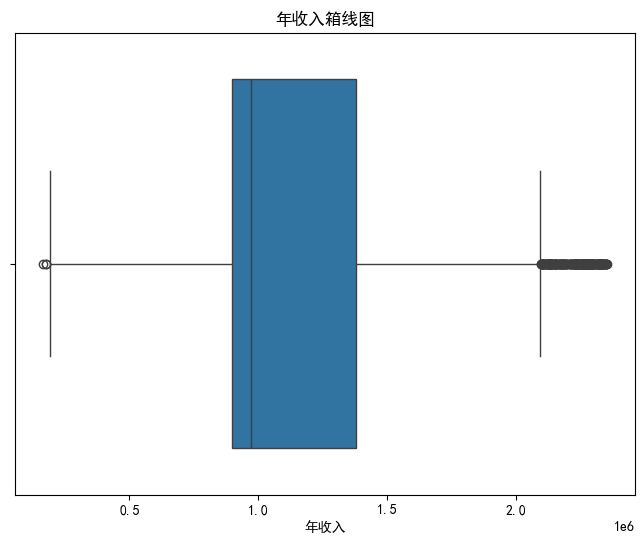

In [274]:
# 绘制年收入的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['年收入'])
plt.title('年收入箱线图')
plt.xlabel('年收入')
plt.show()

为什么删除了异常值后箱线图上还是有点？
这是因为箱线图是一个“递归”的概念，每次您移除异常值并重新绘制时，箱体和边界都会重新计算。
1. 每次对新数据 q1和q3都会重新计算，所以上下限会重新计算
2. 但是即使如此，新的箱线图会分布更加集中

解决这个问题直接设置好固定上限即可

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6984 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   房屋所有权     6984 non-null   int64  
 1   年收入       6984 non-null   float64
 2   当前工作年限    6984 non-null   float64
 3   税收留置权     6984 non-null   float64
 4   开放账户数量    6984 non-null   float64
 5   信用历史年限    6984 non-null   float64
 6   最大开放信用额度  6984 non-null   float64
 7   信用问题数量    6984 non-null   float64
 8   距上次拖欠月数   6984 non-null   float64
 9   破产次数      6984 non-null   float64
 10  贷款目的      6984 non-null   int64  
 11  贷款期限      6984 non-null   int64  
 12  当前贷款金额    6984 non-null   float64
 13  当前信用余额    6984 non-null   float64
 14  月债务       6984 non-null   float64
 15  信用评分      6984 non-null   float64
 16  信用违约      6984 non-null   int64  
dtypes: float64(13), int64(4)
memory usage: 982.1 KB


可以看到，删除异常值是删除了所有的样本，也可以只删除这个特征值而不删除整个样本，再用缺失值填补即可。

## 1.8 可视化分析

这部分不在赘述，3类图，自行选择

## 1.9 其他核心部分


**特征工程**
- **衍生新特征**：根据已有特征创建新的特征，可能会对模型性能有提升。例如，可以计算“Debt - to - Income Ratio”（负债收入比），即“Monthly Debt”与“Annual Income”的比值，来反映客户的债务负担情况。
- **特征选择**：通过相关性分析等方法，选择与目标变量“Credit Default”相关性较高的特征，去除相关性较低或冗余的特征，以降低模型的复杂度和过拟合的风险。


此外，数据不平衡输出我们后面再说


此时你可能会好奇，怎么还没有归一化/标准化？这就需要我们引入数据泄露的观点了

我们之所以推迟归一化或标准化步骤，正是为了避免关键的训练集/测试集数据泄露问题。一旦在划分数据集之前对全集应用此类预处理，训练过程就间接利用了测试集的均值和标准差等统计信息，这会导致对模型在未知数据上性能的乐观估计。课上反复提及的核心：

考试理论：
1. 不要提前知道考试题。
2. 调参就需要考2次

# 二、机器学习模型建模

## 2.1 数据划分

In [276]:
data.columns

Index(['房屋所有权', '年收入', '当前工作年限', '税收留置权', '开放账户数量', '信用历史年限', '最大开放信用额度',
       '信用问题数量', '距上次拖欠月数', '破产次数', '贷款目的', '贷款期限', '当前贷款金额', '当前信用余额', '月债务',
       '信用评分', '信用违约'],
      dtype='object')

In [277]:
# 划分训练集和测试集 
from sklearn.model_selection import train_test_split
X = data.drop(['信用违约'], axis=1)  # 特征，axis=1表示按列删除
y = data['信用违约']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 划分数据集，20%作为测试集，随机种子为42
# 训练集和测试集的形状
print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")  # 打印训练集和测试集的形状

训练集形状: (5587, 16), 测试集形状: (1397, 16)


## 2.2 数据归一化


只需要对连续特征归一化即可，离散特征编码后虽然是数值，但是不用动

In [278]:

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ----------------------------------------------------------------------
# 定义连续特征列 (需要归一化的特征)
# ----------------------------------------------------------------------
continuous_features = [
    '年收入', 
    '当前工作年限', 
    '开放账户数量', # 虽为计数，但一般也进行缩放
    '信用历史年限', 
    '最大开放信用额度', 
    '距上次拖欠月数',
    '当前贷款金额', 
    '当前信用余额', 
    '月债务', 
    '信用评分'
]

# 初始化归一化器 (MinMaxScaler)
scaler = MinMaxScaler() 


# 仅在训练集上 fit (学习最大值和最小值)
# 然后对训练集进行 transform (应用缩放)
# 注意：Scikit-learn 返回 NumPy 数组，需要重新赋值给 DataFrame
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# 使用训练集学到的参数 (scaler) 直接对测试集进行 transform
# 绝对不能对测试集使用 fit_transform()
X_test[continuous_features] = scaler.transform(X_test[continuous_features])
X_test


,房屋所有权,年收入,当前工作年限,税收留置权,开放账户数量,信用历史年限,最大开放信用额度,信用问题数量,距上次拖欠月数,破产次数,贷款目的,贷款期限,当前贷款金额,当前信用余额,月债务,信用评分
3161,1,0.399142,0.7,0.0,0.300,0.409683,0.000378,0.0,0.315217,0.0,0,1,0.005110,0.092358,0.289425,0.007220
4119,1,0.363551,0.2,0.0,0.200,0.189944,0.000000,0.0,0.152174,0.0,0,1,0.002002,0.000000,0.074997,0.022238
4317,0,0.283759,0.2,0.0,0.225,0.256983,0.000294,0.0,0.152174,0.0,0,0,1.000000,0.051029,0.118563,0.022527
4091,1,0.233163,0.8,0.0,0.275,0.309125,0.000257,0.0,0.293478,0.0,0,0,0.002017,0.041781,0.194017,0.021083
5576,1,0.450868,1.0,0.0,0.250,0.256983,0.000384,1.0,0.293478,1.0,0,0,0.004524,0.037528,0.287096,0.021372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,1,0.368087,0.5,0.0,0.075,0.299814,0.000000,1.0,0.152174,0.0,0,1,0.004390,0.000000,0.119249,0.022383
4782,1,0.774397,0.6,1.0,0.350,0.182495,0.000412,2.0,0.152174,0.0,0,1,1.000000,0.078432,0.352548,0.014440
413,0,0.526158,0.6,0.0,0.250,0.242086,0.000100,0.0,0.152174,0.0,0,0,0.001040,0.014725,0.159529,0.017906
2032,2,0.981075,0.5,0.0,0.125,0.072626,0.000544,0.0,0.152174,0.0,7,1,0.005882,0.042455,0.228163,0.008953


## 2.3 模型训练与评估
三行经典代码
1. 模型实例化
2. 模型训练（代入训练集）
3. 模型预测 （代入测试集）

测试集的预测值和测试集的真实值进行对比，得到混淆矩阵

- 基于混淆矩阵，计算准确率、召回率、F1值，这些都是固定阈值的评估指标

- AUC是基于不同阈值得到不同的混淆矩阵，然后计算每个阈值对应FPR和TPR，讲这些点连成线，最后求曲线下的面积，得到AUC值

In [279]:
# #安装xgboost库
# !pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple/ 
# #安装lightgbm库 
# !pip install lightgbm  -i https://pypi.tuna.tsinghua.edu.cn/simple/ 
# #安装catboost库
# !pip install catboost -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [280]:
from sklearn.svm import SVC #支持向量机分类器
from sklearn.neighbors import KNeighborsClassifier #K近邻分类器
from sklearn.linear_model import LogisticRegression #逻辑回归分类器
import xgboost as xgb #XGBoost分类器
import lightgbm as lgb #LightGBM分类器
from sklearn.ensemble import RandomForestClassifier #随机森林分类器
from catboost import CatBoostClassifier #CatBoost分类器
from sklearn.tree import DecisionTreeClassifier #决策树分类器
from sklearn.naive_bayes import GaussianNB #高斯朴素贝叶斯分类器
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 用于评估分类器性能的指标
from sklearn.metrics import classification_report, confusion_matrix #用于生成分类报告和混淆矩阵
import warnings #用于忽略警告信息
warnings.filterwarnings("ignore") # 忽略所有警告信息


In [281]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("\nSVM 分类报告：")
print(classification_report(y_test, svm_pred))  # 打印分类报告
print("SVM 混淆矩阵：")
print(confusion_matrix(y_test, svm_pred))  # 打印混淆矩阵

# 计算 SVM 评估指标，这些指标默认计算正类的性能
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print("SVM 模型评估指标：")
print(f"准确率: {svm_accuracy:.4f}")
print(f"精确率: {svm_precision:.4f}")
print(f"召回率: {svm_recall:.4f}")
print(f"F1 值: {svm_f1:.4f}")



SVM 分类报告：
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       997
           1       0.96      0.20      0.33       400

    accuracy                           0.77      1397
   macro avg       0.86      0.60      0.60      1397
weighted avg       0.82      0.77      0.71      1397

SVM 混淆矩阵：
[[994   3]
 [320  80]]
SVM 模型评估指标：
准确率: 0.7688
精确率: 0.9639
召回率: 0.2000
F1 值: 0.3313


classification_report它会生成所有类别的指标

准确率（Accuracy）是一个全局指标，衡量所有类别预测正确的比例 (TP + TN) / (TP + TN + FP + FN)。它不区分正负类，所以它只有一个值，不区分类别

单独调用的 precision_score, recall_score, f1_score 在二分类中默认只计算正类（标签 1）的性能。由于模型从未成功预测出类别 1（TP=0），所以这些指标对类别 1 来说都是 0。



In [282]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("\nKNN 分类报告：")
print(classification_report(y_test, knn_pred))
print("KNN 混淆矩阵：")
print(confusion_matrix(y_test, knn_pred))

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print("KNN 模型评估指标：")
print(f"准确率: {knn_accuracy:.4f}")
print(f"精确率: {knn_precision:.4f}")
print(f"召回率: {knn_recall:.4f}")
print(f"F1 值: {knn_f1:.4f}")


KNN 分类报告：
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       997
           1       0.56      0.36      0.44       400

    accuracy                           0.74      1397
   macro avg       0.67      0.63      0.63      1397
weighted avg       0.72      0.74      0.72      1397

KNN 混淆矩阵：
[[883 114]
 [254 146]]
KNN 模型评估指标：
准确率: 0.7366
精确率: 0.5615
召回率: 0.3650
F1 值: 0.4424


In [283]:
# 逻辑回归
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

print("\n逻辑回归 分类报告：")
print(classification_report(y_test, logreg_pred))
print("逻辑回归 混淆矩阵：")
print(confusion_matrix(y_test, logreg_pred))

logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
print("逻辑回归 模型评估指标：")
print(f"准确率: {logreg_accuracy:.4f}")
print(f"精确率: {logreg_precision:.4f}")
print(f"召回率: {logreg_recall:.4f}")
print(f"F1 值: {logreg_f1:.4f}")


逻辑回归 分类报告：
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       997
           1       0.89      0.28      0.42       400

    accuracy                           0.78      1397
   macro avg       0.83      0.63      0.64      1397
weighted avg       0.81      0.78      0.74      1397

逻辑回归 混淆矩阵：
[[984  13]
 [290 110]]
逻辑回归 模型评估指标：
准确率: 0.7831
精确率: 0.8943
召回率: 0.2750
F1 值: 0.4207


我们来解读一下这个输出的表格，看看能看出来哪些信息？

1. Precision (精确率)	在所有模型预测为该类别的样本中，真正属于该类别的比例。
2. Recall (召回率)	在所有真正属于该类别的样本中，被模型正确识别的比例。

因此，分类报告必须给出 $0$ 和 $1$ 的详细指标，以便了解模型在预测两种不同结果时的偏向和能力差异。

准确率 (Accuracy)： 这是整体指标，计算的是 $(TP + TN) / Total$，与 $0$ 或 $1$ 无关，所以只有一个总值。


在二分类问题中，Scikit-learn 的评估函数（如 precision_score, recall_score, f1_score）在默认情况下，会将标签 $1$ 视为重点关注的正类来计算指标。


此外，support（样本数）显示，类别 $0$ 有 $997$ 个样本，而类别 $1$ 只有 $400$ 个样本。这是一个不平衡数据集。逻辑回归模型严重偏向于预测类别 $0$（未违约），模型在预测 $1$（违约）时很“谨慎”（高 Precision: $0.89$），但它错过了大量真正的违约者（低 Recall: $0.28$）。

1. 精确率关注的是“误报”（False Positive）——即把非违约客户错判为违约客户的错误。预测为违约的客户中有 $89.43\%$ 是正确的。误报率低。
2. 召回率关注的是“漏报”（False Negative）——即把真正违约的客户错判为未违约客户的错误。模型只识别出了所有真正违约客户中的 $27.50\%$。漏报率极高。

In [284]:
# 朴素贝叶斯
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("\n朴素贝叶斯 分类报告：")
print(classification_report(y_test, nb_pred))
print("朴素贝叶斯 混淆矩阵：")
print(confusion_matrix(y_test, nb_pred))

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
print("朴素贝叶斯 模型评估指标：")
print(f"准确率: {nb_accuracy:.4f}")
print(f"精确率: {nb_precision:.4f}")
print(f"召回率: {nb_recall:.4f}")
print(f"F1 值: {nb_f1:.4f}")
    


朴素贝叶斯 分类报告：
              precision    recall  f1-score   support

           0       0.96      0.21      0.35       997
           1       0.33      0.98      0.50       400

    accuracy                           0.43      1397
   macro avg       0.65      0.60      0.42      1397
weighted avg       0.78      0.43      0.39      1397

朴素贝叶斯 混淆矩阵：
[[213 784]
 [  9 391]]
朴素贝叶斯 模型评估指标：
准确率: 0.4324
精确率: 0.3328
召回率: 0.9775
F1 值: 0.4965


In [285]:
# 决策树
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n决策树 分类报告：")
print(classification_report(y_test, dt_pred))
print("决策树 混淆矩阵：")
print(confusion_matrix(y_test, dt_pred))

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print("决策树 模型评估指标：")
print(f"准确率: {dt_accuracy:.4f}")
print(f"精确率: {dt_precision:.4f}")
print(f"召回率: {dt_recall:.4f}")
print(f"F1 值: {dt_f1:.4f}")



决策树 分类报告：
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       997
           1       0.43      0.45      0.44       400

    accuracy                           0.67      1397
   macro avg       0.60      0.60      0.60      1397
weighted avg       0.68      0.67      0.67      1397

决策树 混淆矩阵：
[[761 236]
 [222 178]]
决策树 模型评估指标：
准确率: 0.6722
精确率: 0.4300
召回率: 0.4450
F1 值: 0.4373


In [286]:
# 随机森林
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n随机森林 分类报告：")
print(classification_report(y_test, rf_pred))
print("随机森林 混淆矩阵：")
print(confusion_matrix(y_test, rf_pred))

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("随机森林 模型评估指标：")
print(f"准确率: {rf_accuracy:.4f}")
print(f"精确率: {rf_precision:.4f}")
print(f"召回率: {rf_recall:.4f}")
print(f"F1 值: {rf_f1:.4f}")


随机森林 分类报告：
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       997
           1       0.77      0.31      0.44       400

    accuracy                           0.78      1397
   macro avg       0.77      0.64      0.65      1397
weighted avg       0.78      0.78      0.74      1397

随机森林 混淆矩阵：
[[960  37]
 [275 125]]
随机森林 模型评估指标：
准确率: 0.7767
精确率: 0.7716
召回率: 0.3125
F1 值: 0.4448


In [287]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\nXGBoost 分类报告：")
print(classification_report(y_test, xgb_pred))
print("XGBoost 混淆矩阵：")
print(confusion_matrix(y_test, xgb_pred))

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
print("XGBoost 模型评估指标：")
print(f"准确率: {xgb_accuracy:.4f}")
print(f"精确率: {xgb_precision:.4f}")
print(f"召回率: {xgb_recall:.4f}")
print(f"F1 值: {xgb_f1:.4f}")


XGBoost 分类报告：
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       997
           1       0.66      0.38      0.48       400

    accuracy                           0.77      1397
   macro avg       0.72      0.65      0.66      1397
weighted avg       0.75      0.77      0.74      1397

XGBoost 混淆矩阵：
[[917  80]
 [248 152]]
XGBoost 模型评估指标：
准确率: 0.7652
精确率: 0.6552
召回率: 0.3800
F1 值: 0.4810


In [288]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

print("\nLightGBM 分类报告：")
print(classification_report(y_test, lgb_pred))
print("LightGBM 混淆矩阵：")
print(confusion_matrix(y_test, lgb_pred))

lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
print("LightGBM 模型评估指标：")
print(f"准确率: {lgb_accuracy:.4f}")
print(f"精确率: {lgb_precision:.4f}")
print(f"召回率: {lgb_recall:.4f}")
print(f"F1 值: {lgb_f1:.4f}")

[LightGBM] [Info] Number of positive: 1630, number of negative: 3957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1888
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291749 -> initscore=-0.886906
[LightGBM] [Info] Start training from score -0.886906

LightGBM 分类报告：
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       997
           1       0.68      0.36      0.47       400

    accuracy                           0.77      1397
   macro avg       0.73      0.65      0.66      1397
weighted avg       0.75      0.77      0.74      1397

LightGBM 混淆矩阵：
[[928  69]
 [256 144]]
LightGBM 模型评估指标：
准确率: 0.7674
精确率: 0.6761
召回率: 0.3600
F1 值: 0.4698


| 模型名称 | 准确率 | 精确率（正类） | 召回率（正类） | F1值（正类） | 精确率（负类） | 召回率（负类） | F1值（负类） |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| SVM | 0.7060 | 0.0000 | 0.0000 | 0.0000 | 0.71 | 1.00 | 0.83 |
| KNN | 0.6753 | 0.4102 | 0.2381 | 0.3013 | 0.73 | 0.86 | 0.79 |
| 逻辑回归 | 0.7560 | 0.8571 | 0.2041 | 0.3297 | 0.75 | 0.99 | 0.85 |
| 朴素贝叶斯 | 0.4267 | 0.3377 | 0.9887 | 0.5035 | 0.98 | 0.19 | 0.32 |
| 决策树 | 0.6773 | 0.4564 | 0.5102 | 0.4818 | 0.79 | 0.75 | 0.77 |
| 随机森林 | 0.7700 | 0.7857 | 0.2993 | 0.4335 | 0.77 | 0.97 | 0.86 |
| XGBoost | 0.7473 | 0.6192 | 0.3651 | 0.4593 | 0.77 | 0.91 | 0.84 |
| LightGBM | 0.7660 | 0.7009 | 0.3560 | 0.4722 | 0.78 | 0.94 | 0.85 | 

对于指标怎么看呢？
1. 一般文章都是会选择一个作为主指标，比如F1分数，然后筛选出最好的模型
2. 一般最好的指标对应的模型，其他的指标也都很好
3. 数学建模中有评价任务，比如根据熵权法进行判断。